# Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install onnxruntime
!pip -q install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.6 MB/s eta 0:00:00


<h1><a href="https://colab.research.google.com/drive/1vTMWs3y2mfLxizHdFnS2Ry2kfHu5jhek#scrollTo=H2YtTlcCrrZP">01 Embedding</a></h1>

In [ ]:
from imutils import paths
import numpy as np
import argparse
import pickle
import cv2
import os
from skimage import transform as trans
import glob
import onnxruntime as ort
import pickle

In [ ]:
class FaceModel:
    def __init__(self, embedding_model_path):
        self.session = ort.InferenceSession(embedding_model_path)

    def preprocess_image(self, img_input):
        # Check if the input is a file path (string) or a NumPy array (image)
        if isinstance(img_input, str):  # If it's a file path
            img = cv2.imread(img_input)
            if img is None:
                raise ValueError(f"Image not found at path: {img_input}")
        elif isinstance(img_input, np.ndarray):  # If it's an image (NumPy array)
            img = img_input
        else:
            raise TypeError("Input must be a file path (str) or an image (np.ndarray)")

        # Resize the image to (112, 112)
        img = cv2.resize(img, (112, 112))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.transpose(img, (2, 0, 1)).astype(np.float32)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        return img

    def get_embedding(self, img):
        inputs = self.session.get_inputs()
        outputs = self.session.run(None, {inputs[0].name: img})
        embedding = outputs[0]
        return embedding[0]

In [ ]:
embedding_model_path = "/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx"
face_model = FaceModel(embedding_model_path)

In [ ]:
dataset_path = "/content/drive/MyDrive/coconut/Dataset/normal_datasets"
imagePaths = list(paths.list_images(dataset_path))
imagePaths

['/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/10.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/12.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/18.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/235.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/237.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/25.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/24.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/256.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/27.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/29.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/294.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/295.jpg',
 '/content/drive/MyDrive/coconut/Dataset/normal_datasets/Arya Stark/30.

In [ ]:
knownEmbeddings = []
knownNames = []
total = 0
print("Start Embedding process ...")
for i,imagePath in enumerate(imagePaths):
    # print(f"{i} : {imagePath}")
    name = imagePath.split(os.path.sep)[-2]
    # print(name)
    print(f"processing image {i+1}/{len(imagePaths)} : {name}")
    img_path = imagePath
    prep_img = face_model.preprocess_image(img_path)
    # print(prep_img)
    # Get the face embedding vector
    face_embedding = face_model.get_embedding(prep_img)
    # print(face_embedding)
    knownNames.append(name)
    knownEmbeddings.append(face_embedding)
    total = total + 1
    # break
    # if i == 10:
    #     break
print(total," faces embedded")

data = {
    'embeddings': knownEmbeddings,
    'names' : knownNames
}
data

Start Embedding process ...
processing image 1/337 : Arya Stark
processing image 2/337 : Arya Stark
processing image 3/337 : Arya Stark
processing image 4/337 : Arya Stark
processing image 5/337 : Arya Stark
processing image 6/337 : Arya Stark
processing image 7/337 : Arya Stark
processing image 8/337 : Arya Stark
processing image 9/337 : Arya Stark
processing image 10/337 : Arya Stark
processing image 11/337 : Arya Stark
processing image 12/337 : Arya Stark
processing image 13/337 : Arya Stark
processing image 14/337 : Arya Stark
processing image 15/337 : Arya Stark
processing image 16/337 : Arya Stark
processing image 17/337 : Arya Stark
processing image 18/337 : Arya Stark
processing image 19/337 : Arya Stark
processing image 20/337 : Arya Stark
processing image 21/337 : Arya Stark
processing image 22/337 : Arya Stark
processing image 23/337 : Arya Stark
processing image 24/337 : Arya Stark
processing image 25/337 : Arya Stark
processing image 26/337 : Arya Stark
processing image 27

{'embeddings': [array([-7.99405038e-01,  1.09619081e+00,  1.57759571e+00,  2.04311490e+00,
         -1.16497731e+00, -4.25916731e-01,  1.27161503e+00, -8.31269324e-01,
          9.24571574e-01,  9.71908569e-02, -1.29803884e+00,  5.15410781e-01,
          2.30093908e+00, -7.27608204e-01, -5.25574923e-01,  1.43710017e-01,
         -8.29747796e-01, -2.90552974e-01,  1.55281281e+00,  1.58478081e+00,
          4.96989191e-01, -1.58604729e+00, -1.01517603e-01,  2.36572057e-01,
          8.96370947e-01, -1.35917163e+00,  1.21024847e-02,  3.00073951e-01,
         -2.18257338e-01,  7.08371639e-01, -1.54949978e-01, -2.09834129e-01,
         -8.06650639e-01, -1.02496529e+00,  1.64607728e+00, -3.74086380e+00,
          1.39501184e-01,  9.18948799e-02,  6.48696065e-01,  1.57794297e+00,
          1.41795862e+00, -3.52657616e-01, -2.95061618e-01, -4.77317795e-02,
          7.97266960e-01,  6.42528296e-01, -5.07797539e-01,  9.55170631e-01,
          6.20748758e-01, -4.79771733e-01, -3.06653053e-01,  5

In [ ]:
# Define the path where you want to save the embeddings
embeddings_output_path = '/content/embeddings_normal_datasets.pickle'

# Save to output
data = {"embeddings": knownEmbeddings, "names": knownNames}

with open(embeddings_output_path, "wb") as f:
    f.write(pickle.dumps(data))

<hr>

<h1><a href="https://colab.research.google.com/drive/1vTMWs3y2mfLxizHdFnS2Ry2kfHu5jhek#scrollTo=H2YtTlcCrrZP">02 Train</a></h1>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import argparse
import pickle

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
import keras

class SoftMax():
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
    def build(self):
        model = Sequential()
        model.add(Input(shape=self.input_shape))
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes, activation='softmax'))

        optimizer = Adam(learning_rate=0.001)
        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

        return model  # Ensure the model is returned


In [ ]:
embeddings         = "/content/embeddings_normal_datasets.pickle"
model              = "/content/drive/MyDrive/coconut/outputs/normal_model.h5"
label_encoder_path = "/content/drive/MyDrive/coconut/outputs/le.pickle"

In [ ]:
with open(embeddings,"rb") as f:
    data = pickle.load(f)
data

{'embeddings': [array([-7.99405038e-01,  1.09619081e+00,  1.57759571e+00,  2.04311490e+00,
         -1.16497731e+00, -4.25916731e-01,  1.27161503e+00, -8.31269324e-01,
          9.24571574e-01,  9.71908569e-02, -1.29803884e+00,  5.15410781e-01,
          2.30093908e+00, -7.27608204e-01, -5.25574923e-01,  1.43710017e-01,
         -8.29747796e-01, -2.90552974e-01,  1.55281281e+00,  1.58478081e+00,
          4.96989191e-01, -1.58604729e+00, -1.01517603e-01,  2.36572057e-01,
          8.96370947e-01, -1.35917163e+00,  1.21024847e-02,  3.00073951e-01,
         -2.18257338e-01,  7.08371639e-01, -1.54949978e-01, -2.09834129e-01,
         -8.06650639e-01, -1.02496529e+00,  1.64607728e+00, -3.74086380e+00,
          1.39501184e-01,  9.18948799e-02,  6.48696065e-01,  1.57794297e+00,
          1.41795862e+00, -3.52657616e-01, -2.95061618e-01, -4.77317795e-02,
          7.97266960e-01,  6.42528296e-01, -5.07797539e-01,  9.55170631e-01,
          6.20748758e-01, -4.79771733e-01, -3.06653053e-01,  5

In [ ]:
# Encode the labels
le = LabelEncoder()
labels = le.fit_transform(data["names"])     # convert name -> number 0,1,2,3,4,....
print(labels)
num_classes = len(np.unique(labels))         # How many people
labels = labels.reshape(-1,1)                # เปลี่ยน มิติ ของข้อมูล

one_hot_encoder = OneHotEncoder(sparse = False)  # ทำให้เป็น One hot
labels = one_hot_encoder.fit_transform(labels)   # ทำให้เป็น One hot
labels                                           # ทำให้เป็น One hot

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 7 7 7]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
embeddings = np.array(data["embeddings"])          # convert to numpy metrix with value 0-1
embeddings

array([[-0.79940504,  1.0961908 ,  1.5775957 , ..., -0.02598309,
        -0.12471812, -0.2033371 ],
       [ 0.13374199,  0.44191265,  0.23037636, ..., -1.0582614 ,
        -0.68665624, -0.2302026 ],
       [-0.12869594, -1.3275222 ,  0.9225203 , ...,  0.24464068,
        -0.74986863,  0.23553978],
       ...,
       [ 1.360464  ,  0.1288621 , -0.4174683 , ..., -0.76449835,
        -1.172831  , -1.284413  ],
       [ 1.6281303 ,  0.46380484, -0.03391123, ..., -0.28015414,
        -1.4182302 , -1.337791  ],
       [ 1.2987971 ,  0.7134181 , -0.91685265, ..., -0.20996808,
        -1.1204822 , -0.866299  ]], dtype=float32)

In [ ]:
# Check shapes of embeddings and labels
print("Embeddings shape:", embeddings.shape)  # Should print (6, 512)
print("Labels shape:", labels.shape)          # Should print (6, 3)

BATCH_SIZE = 32
EPOCHS = 100
input_shape = embeddings.shape[1]    # Data shape is (6,512) There are 6 image with 512 Embedding vector
print(input_shape)

Embeddings shape: (337, 512)
Labels shape: (337, 9)
512


In [ ]:
softmax = SoftMax(input_shape=(input_shape,), num_classes=num_classes)
model = softmax.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           9,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,584,137 (6.04 MB)

 Trainable params: 1,584,137 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Fit the model
# model.fit(embeddings, labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
# Create KFold with 5 splits
cv = KFold(n_splits=4, random_state=42, shuffle=True)
history = {'acc': [], 'val_acc': [], 'loss': [], 'val_loss': []}

# Train model with KFold
for train_idx, valid_idx in cv.split(embeddings):
    X_train, X_val = embeddings[train_idx], embeddings[valid_idx]
    y_train, y_val = labels[train_idx], labels[valid_idx]

    # Reinitialize the model for each fold
    softmax = SoftMax(input_shape=(input_shape,), num_classes=num_classes)
    model = softmax.build()

    # Train the model
    his = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_val, y_val))

    # Append the history for accuracy and loss
    history['acc'] += his.history['accuracy']  # Updated to 'accuracy' key
    history['val_acc'] += his.history['val_accuracy']  # Updated to 'val_accuracy'
    history['loss'] += his.history['loss']
    history['val_loss'] += his.history['val_loss']

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4955 - loss: 1.4585 - val_accuracy: 0.9882 - val_loss: 0.0584
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9873 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 2.9512e-05
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 1.5710e-05
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.5809e-06
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.8088e-06
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 5.2562e-04 - val_accuracy: 1.0000 - val_loss: 3.1498e-06
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 6.5411e-04 - val_

In [ ]:
model

<Sequential name=sequential_4, built=True>

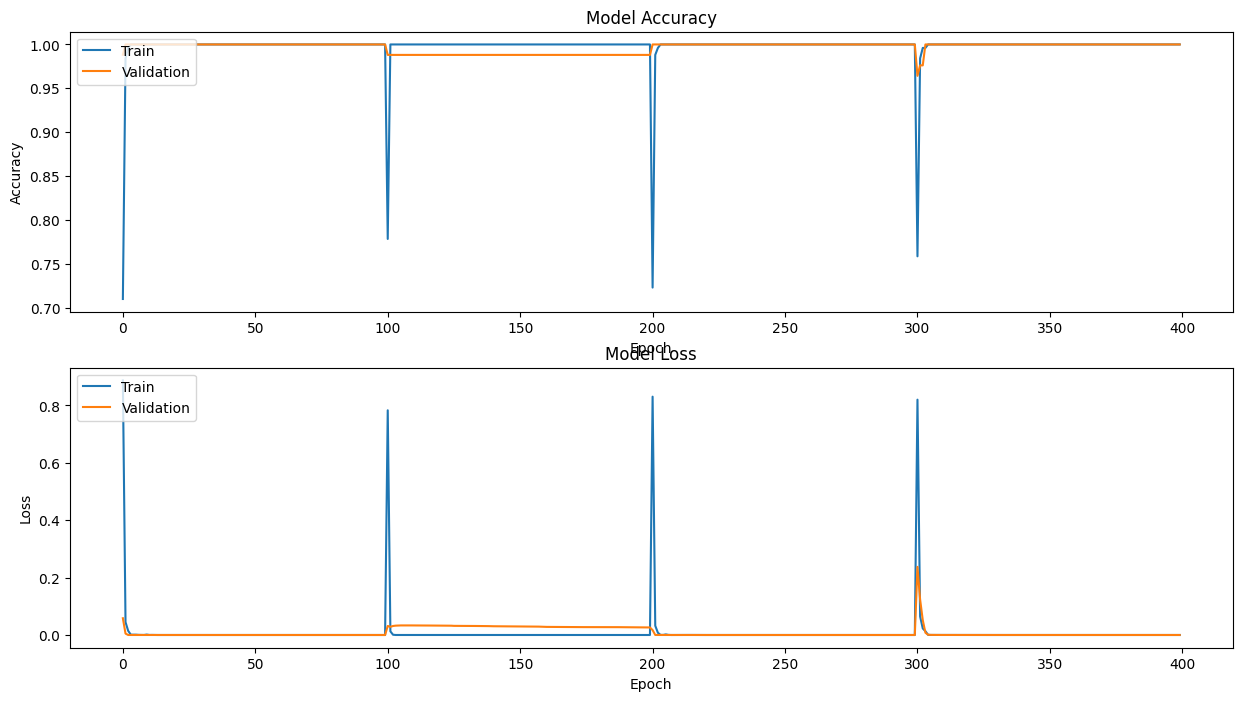

In [ ]:
# Plot training history for accuracy and loss
plt.figure(figsize=(15,8))

# Summary history for accuracy
plt.subplot(211)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summary history for loss
plt.subplot(212)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the accuracy and loss plot
plt.savefig('/content/accuracy_loss.png')
plt.show()

In [ ]:
# Correctly save the model to a file
model.save("/content/my_model_normal.h5")  # Save the model with .h5 extension

# Save the label encoder
with open(label_encoder_path, "wb") as f:
    pickle.dump(le, f)

<hr>

<h1><a href="https://colab.research.google.com/drive/1jiBL9Rj4RPhfiNVXRsFriB9y1HsZ-0Ot">03 Face recognize</a></h1>

In [ ]:
import cv2
import numpy as np
from skimage import transform as trans
import matplotlib.pyplot as plt

from mtcnn.mtcnn import MTCNN

from keras.models import load_model
from imutils import paths
import numpy as np
import argparse
import pickle
import time
import cv2
import os
import pickle

In [ ]:
embeddings = "/content/drive/MyDrive/coconut/outputs/embeddings_normal_datasets.pickle"
le = "/content/drive/MyDrive/coconut/outputs/le.pickle"
detector = MTCNN()

In [ ]:
with open(embeddings,"rb") as f:
    data = pickle.load(f)
# data
with open(le,"rb") as f:
    le = pickle.load(f)

In [ ]:
embeddings = np.array(data['embeddings'])
labels = le.fit_transform(data['names'])         # แทนชื่อคนด้วยตัวเลข
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
# ! pip install onnxruntime
# import onnxruntime as ort
# import cv2
# import numpy as np

# class FaceModel:
#     def __init__(self, embedding_model_path):
#         self.session = ort.InferenceSession(embedding_model_path)

#     def preprocess_image(self, img_input):
#         # Check if the input is a file path (string) or a NumPy array (image)
#         if isinstance(img_input, str):  # If it's a file path
#             img = cv2.imread(img_input)
#             if img is None:
#                 raise ValueError(f"Image not found at path: {img_input}")
#         elif isinstance(img_input, np.ndarray):  # If it's an image (NumPy array)
#             img = img_input
#         else:
#             raise TypeError("Input must be a file path (str) or an image (np.ndarray)")

#         # Resize the image to (112, 112)
#         img = cv2.resize(img, (112, 112))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = np.transpose(img, (2, 0, 1)).astype(np.float32)
#         img = img / 255.0
#         img = np.expand_dims(img, axis=0)  # Add batch dimension
#         return img

#     def get_embedding(self, img):
#         inputs = self.session.get_inputs()
#         outputs = self.session.run(None, {inputs[0].name: img})
#         embedding = outputs[0]
#         return embedding[0]

In [ ]:
# # Initialize faces embedding model
# embedding_model =face_model.FaceModel(args)
embedding_model_path = "/content/drive/MyDrive/coconut/buffalo_l/w600k_r50.onnx"
face_model = FaceModel(embedding_model_path)

In [ ]:
# Load the classifier model
mymodel = "/content/drive/MyDrive/coconut/outputs/my_model_normal.h5"
model = load_model(mymodel)

In [ ]:
def findCosineDistance(vector1, vector2):
    vec1 = vector1.flatten()
    vec2 = vector2.flatten()

    a = np.dot(vec1.T,vec2)
    b = np.dot(vec1.T,vec1)
    c = np.dot(vec2.T,vec2)

    return 1 - (a/(np.sqrt(b)*np.sqrt(c)))
def CosineSimilarity(test_vec, source_vecs):
    cos_dist = 0
    for source_vec in source_vecs:
        cos_dist += findCosineDistance(test_vec, source_vec)
    return cos_dist/len(source_vecs)

In [ ]:
# Setup some useful arguments
cosine_threshold = 0.8
proba_threshold  = 0.85
comparing_num    = 5

In [ ]:
img = cv2.imread("/content/drive/MyDrive/coconut/test/003.jpg")
bboxes = detector.detect_faces(img)
bboxes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


[{'box': [126, 45, 56, 70],
  'confidence': 0.999983549118042,
  'keypoints': {'left_eye': (147, 73),
   'right_eye': (172, 76),
   'nose': (160, 89),
   'mouth_left': (146, 100),
   'mouth_right': (165, 103)}},
 {'box': [761, 116, 48, 66],
  'confidence': 0.9995587468147278,
  'keypoints': {'left_eye': (769, 142),
   'right_eye': (791, 144),
   'nose': (773, 156),
   'mouth_left': (769, 167),
   'mouth_right': (786, 169)}},
 {'box': [416, 70, 56, 72],
  'confidence': 0.9894174337387085,
  'keypoints': {'left_eye': (435, 100),
   'right_eye': (461, 99),
   'nose': (451, 117),
   'mouth_left': (439, 128),
   'mouth_right': (459, 127)}}]

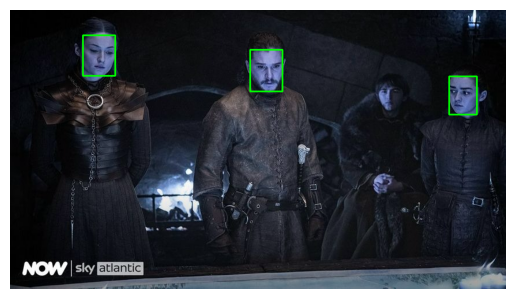

In [ ]:
img_test = img.copy()
if len(bboxes) != 0:
    for bboxe in bboxes:
        # bbox = bboxe['box']
        # print(bbox)

        x, y, width, height = bboxe['box']
        cv2.rectangle(img_test, (x, y), (x+width, y+height), (0, 255, 0), 2)  # Green bounding box

    plt.imshow(img_test)
    plt.axis('off')  # Hide axes
    plt.show()

In [ ]:
import cv2
import numpy as np
from skimage import transform as trans
import matplotlib.pyplot as plt
class FacePreprocessor:
    def __init__(self,image_size='112,112',margin=44):
        self.image_size = [int(x) for x in image_size.split(',')]
        if len(self.image_size) == 1:
            self.image_size = [self.image_size[0],self.image_size[0]]
        self.margin = margin
        assert len(self.image_size) == 2
        assert self.image_size[0] == 112 and (self.image_size[1] == 112 or self.image_size[1] == 96)
    def read_image(self,img_path,mode='rgb',layout='HWC'):
        if mode == 'gray': # gray -> gray
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        else:
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if mode == 'rgb':
                img = img[..., ::-1]
            if layout == 'CHW':
                img = np.transpose(img,(2,0,1))
        return img
    def preprocess(self, img, bbox=None, landmark=None):
        if isinstance(img, str):
            img = self.read_image(img)

        M = None
        if landmark is not None:
            assert len(self.image_size) == 2
            src = np.array([
                [30.2946, 51.6963],
                [65.5318, 51.5014],
                [48.0252, 71.7366],
                [33.5493, 92.3655],
                [62.7299, 92.2041]], dtype=np.float32)

            if self.image_size[1] == 112:
                src[:, 0] += 8.0
            dst = landmark.astype(np.float32)

            tform = trans.SimilarityTransform()
            tform.estimate(dst, src)
            M = tform.params[0:2, :]

        if M is None:
            return self._center_crop(img, bbox)
        else:
            return self._warp_image(img, M)

    def _center_crop(self, img, bbox):
        if bbox is None:
            det = np.zeros(4, dtype=np.int32)
            det[0] = int(img.shape[1] * 0.0625)
            det[1] = int(img.shape[0] * 0.0625)
            det[2] = img.shape[1] - det[0]
            det[3] = img.shape[0] - det[1]
        else:
            det = bbox

        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0] - self.margin // 2, 0)
        bb[1] = np.maximum(det[1] - self.margin // 2, 0)
        bb[2] = np.minimum(det[2] + self.margin // 2, img.shape[1])
        bb[3] = np.minimum(det[3] + self.margin // 2, img.shape[0])

        ret = img[bb[1]:bb[3], bb[0]:bb[2], :]
        if len(self.image_size) > 0:
            ret = cv2.resize(ret, (self.image_size[1], self.image_size[0]))
        return ret

    def _warp_image(self, img, M):
        assert len(self.image_size) == 2
        warped = cv2.warpAffine(img, M, (self.image_size[1], self.image_size[0]), borderValue=0.0)
        return warped


In [ ]:
preprocessor = FacePreprocessor(image_size='112,112',margin=44)

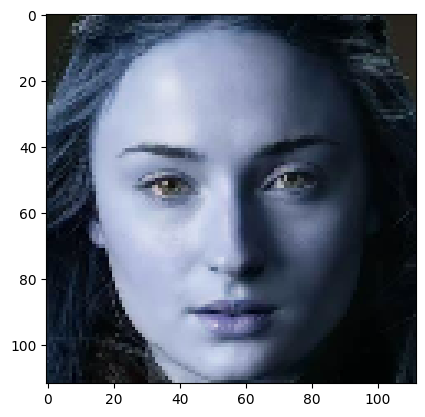

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[6.3810941e-16 1.7932220e-13 5.9344261e-13 1.9276085e-12 8.9542956e-14
 1.0000000e+00 3.2754847e-12 1.2272335e-13 5.2295189e-16]
0.4098909914493561
Recognized: Sansa Stark <100.00>


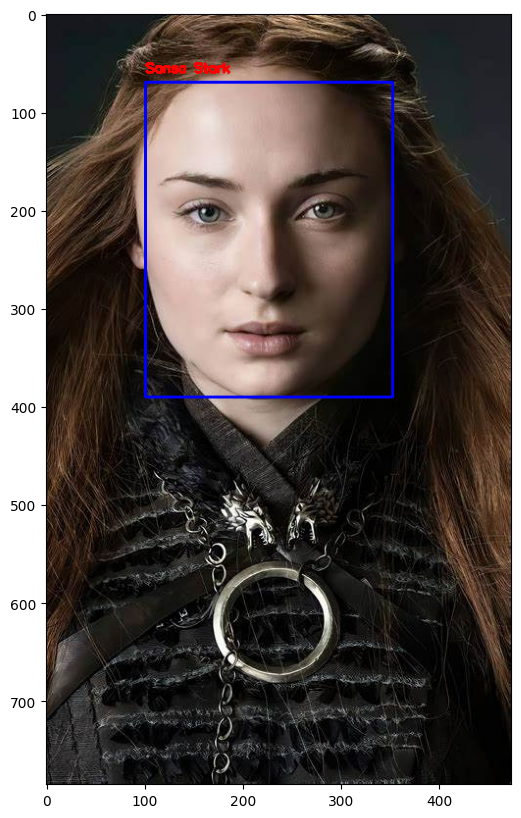

In [ ]:
if len(bboxes) != 0:
    for bboxe in bboxes:
        bbox = bboxe['box']
        bbox = np.array([bbox[0],bbox[1],bbox[0]+bbox[2],bbox[1]+bbox[3]])      # Frame ของหน้า
        landmarks = bboxe['keypoints']
        landmarks = np.array([                                                  # Extract landmark keypoint
            landmarks["left_eye"][0],
            landmarks["right_eye"][0],
            landmarks["nose"][0],
            landmarks["mouth_left"][0],
            landmarks["mouth_right"][0],
            landmarks["left_eye"][1],
            landmarks["right_eye"][1],
            landmarks["nose"][1],
            landmarks["mouth_left"][1],
            landmarks["mouth_right"][1]
        ])
        # print(landmarks)
        landmarks = landmarks.reshape((2,5)).T
        # print(landmarks)
        nimg = preprocessor.preprocess(img,bbox,landmarks)                      # ได้หน้าของแต่ละคน
        plt.imshow(nimg)
        plt.show()
        prep_img = face_model.preprocess_image(nimg)
        # img -> Embedding vector
        embedding = face_model.get_embedding(prep_img).reshape(1,-1)
        # print(embedding)

        text = "???"

        # Predict class
        preds = model.predict(embedding)                                        # [[9.9969018e-01 3.0968967e-04 1.1600605e-07]]
        preds = preds.flatten()                                                 # [9.9969018e-01 3.0968967e-04 1.1600605e-07]
        print(preds)

        #############################################################################################################################
        j = np.argmax(preds)                                                            # 0,1,2 class ที่มากสุด
        proba = preds[j]                                                                # เอาเปอร์เซ้นของตัวที่มากที่สุดมา
        match_class_idx = labels == j
        match_class_idx = np.where(match_class_idx)[0]
        match_class_idx
        selected_idx = np.random.choice(match_class_idx, 20)
        # selected_idx
        compare_embeddings = embeddings[selected_idx]
        # compare_embeddings
        cos_similarity = CosineSimilarity(embedding, compare_embeddings)
        print(cos_similarity)

        if cos_similarity < cosine_threshold and proba > proba_threshold:
            name = le.classes_[j]
            text = "{}".format(name)
            print("Recognized: {} <{:.2f}>".format(name, proba*100))
        y = bbox[1] - 10 if bbox[1] - 10 > 10 else bbox[1] + 10
        cv2.putText(img, text, (bbox[0], y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255,0,0), 2)

        # break
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()